# Written text as operational data

Written text is one type of data

### Why people write?

 - To communicate: their thoughts, feelings, urgency, needs, information

### Why people communicate?

1. To express emotions
1. To share information
1. To enable or elicit an action
1. ...

### We will use written text for the purpose other than 
1. To experience emotion
1. To learn something the author intended us to learn
1. To do what the author intended us to do

### Instead, we will use written text to recognize who wrote it
 - By calculating and comparing word frequencies in written documents
 
See, for example, likely fictional story https://medium.com/@amuse/how-the-nsa-caught-satoshi-nakamoto-868affcef595

In [84]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)

In [85]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)+1) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos[:-1], [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)+1) 
    pylab .yticks (pos[:-1], [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

Common words in Mansfield Park by Jane Austen:
could          856
would          766
fanny          725
must           507
crawford       482
mr             469
much           453
miss           425
mrs            407
said           404
one            357
edmund         351
think          342
sir            341
might          324

Common words in Sense & Sensibility by Jane Austen:
elinor         613
could          577
mrs            537
would          512
marianne       485
said           381
every          374
one            318
must           294
much           288
time           236
know           233
miss           229
dashwood       218
might          217


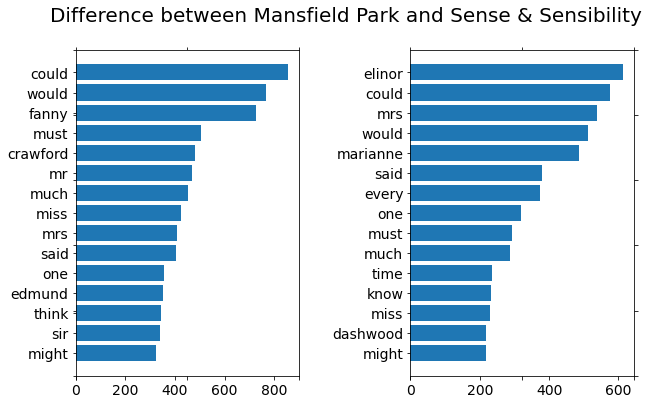

In [86]:
wmp = set() #Keep a set of the most common words in Mansfield Park
(wf_mp, tw_mp) = get_wf('https://www.gutenberg.org/ebooks/141.txt.utf-8')
print('Common words in Mansfield Park by Jane Austen:')
for i in reversed(wf_mp):
    print('{:15}'.format(i[0]) + str(i[1]))
    wmp.add(i[0])
print('\nCommon words in Sense & Sensibility by Jane Austen:')
wss = set() #Keep a set of the most common words in Sense & Sensibility
(wf_ss, tw_ss) = get_wf('https://www.gutenberg.org/ebooks/21839.txt.utf-8')
for i in reversed(wf_ss):
    print('{:15}'.format(i[0]) + str(i[1]))
    wss.add(i[0])
plotTwoLists(wf_mp, wf_ss, 'Difference between Mansfield Park and Sense & Sensibility')

Common words in The Adventures of Sherlock Holmes by Sir Arthur Conan Doyle:
said           485
upon           466
holmes         452
one            369
would          327
could          287
man            286
mr             274
little         268
see            227
may            212
us             183
well           181
think          172
must           171

Common words in Moby Dick by Herman Melville:
whale          913
one            889
like           570
upon           567
old            441
would          427
man            408
ahab           399
whales         384
ye             380
sea            370
ship           366
though         362
yet            337
time           319


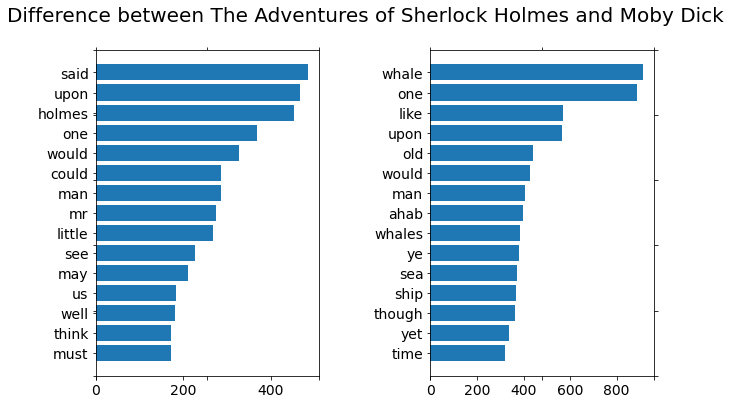

In [87]:
wsh = set() #Keep a set of the most common words in The Adventures of Sherlock Holmes
(wf_sh, tw_sh) = get_wf('https://www.gutenberg.org/ebooks/1661.txt.utf-8')
print('Common words in The Adventures of Sherlock Holmes by Sir Arthur Conan Doyle:')
for i in reversed(wf_sh):
    print('{:15}'.format(i[0]) + str(i[1]))
    wsh.add(i[0])
print('\nCommon words in Moby Dick by Herman Melville:')
wmd = set() #Keep a set of the most common words in Moby Dick
(wf_md, tw_md) = get_wf('https://www.gutenberg.org/ebooks/2701.txt.utf-8')
for i in reversed(wf_md):
    print('{:15}'.format(i[0]) + str(i[1]))
    wmd.add(i[0])
plotTwoLists(wf_sh, wf_md, 'Difference between The Adventures of Sherlock Holmes and Moby Dick')

In [88]:
print('Words common in both Austen books:')
wib = wmp.copy()
wib.intersection_update(wss)
for i in wib:
    print(i)
    
print('\nWords common in both Austen books but not common in either of the other two:')
wia = wsh.copy()
wia.union(wmd)
for i in wia:
    wib.discard(i)
for i in wib:
    print(i)

Words common in both Austen books:
said
much
might
would
could
one
must
mrs
miss

Words common in both Austen books but not common in either of the other two:
much
might
mrs
miss
